Source: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/ and https://www.youtube.com/watch?v=-QUyD0YFYb0

#1. Download and Install Google Play Scraper Package

In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2. Import required packages

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

#3. Find the PeduliLindungi App Id in Google Play Store

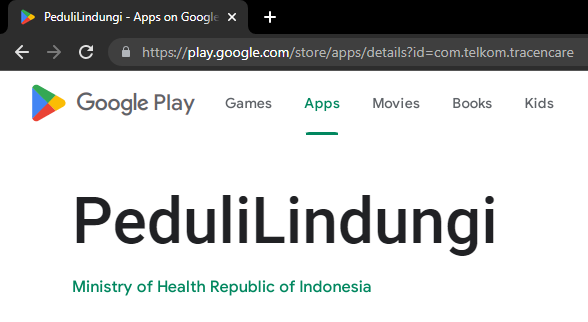

You can see the App Id in the URL after 'id='. In this case, the PeduliLindungi App Id is 'com.telkom.tracencare'

#4. Scrape the Reviews

Use this code if you want to scrape all reviews, but don't run this code if you don't want to scrape all reviews. Because it will take a long time to run.

In [ ]:
from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.telkom.tracencare',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)

You can download reviews in different languages using ISO-Code for language.

If you want to scrape only desired number of reviews, you can use this code

In [4]:
#To scrape desired number of reviews

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.telkom.tracencare',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=100000, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

#5. Put the Reviews into Pandas DataFrame

In [5]:
df_pl = pd.DataFrame(np.array(result),columns=['review'])

df_pl = df_pl.join(pd.DataFrame(df_pl.pop('review').tolist()))

df_pl.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,9462996a-5249-467e-98f0-8f0b26d050d1,Qodir Wong Jowo,https://play-lh.googleusercontent.com/a/ALm5wu...,Bagus,5,0,4.5.2,2022-09-24 09:28:31,"Halo Qadir,\n\nTerima kasih atas dukungan Anda...",2022-09-24 10:08:34
1,d2a643c6-e44a-4290-a072-9ff21ddd5d01,Azis Buton,https://play-lh.googleusercontent.com/a-/ACNPE...,Baik,5,0,4.5.4,2022-09-24 09:28:20,"Halo Azis,\n\nTerima kasih atas dukungan Anda....",2022-09-24 10:09:07
2,68c7c5e2-d43a-4d54-a2fd-6359a45ce8e5,Mba Ipet,https://play-lh.googleusercontent.com/a/ALm5wu...,Good,5,0,None,2022-09-24 09:21:03,"Halo Kak,\n\nTerima kasih atas dukungan Anda.\...",2022-09-24 10:09:20
3,ce458732-674d-431d-af30-2e77204b3a42,Try Kurniawan Akhbar,https://play-lh.googleusercontent.com/a-/ACNPE...,"Nyusahin rakyat, aplikasinya jelek",1,0,4.5.4,2022-09-24 09:15:55,"Halo Try,\n\nJika memiliki pertanyaan umum/ken...",2022-09-24 10:23:37
4,5a770c54-6d20-406f-892a-12d77a0555a5,Heri Sugiono,https://play-lh.googleusercontent.com/a/ALm5wu...,Cepat,5,0,4.5.4,2022-09-24 09:10:37,"Halo Heri,\n\nTerima kasih atas dukungan Anda....",2022-09-24 10:09:32


In [6]:
len(df_pl.index) #Check the number of data

100000

In [7]:
df_pl[['userName', 'score','at', 'content']].head()  #Preview userName, rating, date-time, and reviews only

,userName,score,at,content
0,Qodir Wong Jowo,5,2022-09-24 09:28:31,Bagus
1,Azis Buton,5,2022-09-24 09:28:20,Baik
2,Mba Ipet,5,2022-09-24 09:21:03,Good
3,Try Kurniawan Akhbar,1,2022-09-24 09:15:55,"Nyusahin rakyat, aplikasinya jelek"
4,Heri Sugiono,5,2022-09-24 09:10:37,Cepat


In [8]:
#Run This Code to Sort the Data By Date 

new_df = df_pl[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.tail()

,userName,score,at,content
99995,kornelia endang,5,2021-12-25 16:14:39,bagus👍
99996,Toto Rohimat,5,2021-12-25 16:10:34,bagus
99997,Music Motovlog,1,2021-12-25 16:08:04,Lucu! Masa nomor terdaftar. Gk bs masuk.. bukt...
99998,Randi Bangka,5,2021-12-25 16:06:32,Sangat bagus dan muda untuk mendAftAr
99999,putria putria,2,2021-12-25 15:53:15,"Eror mlu,padahal sya sudah vaksin.app blm komp..."


In [9]:
my_df = sorted_df[['userName', 'score','at', 'content']] #Get userName, rating, date-time, and reviews only

In [10]:
my_df.head()

,userName,score,at,content
0,Qodir Wong Jowo,5,2022-09-24 09:28:31,Bagus
1,Azis Buton,5,2022-09-24 09:28:20,Baik
2,Mba Ipet,5,2022-09-24 09:21:03,Good
3,Try Kurniawan Akhbar,1,2022-09-24 09:15:55,"Nyusahin rakyat, aplikasinya jelek"
4,Heri Sugiono,5,2022-09-24 09:10:37,Cepat


#6. Download The File

In [11]:
my_df.to_csv("100000 Newest PeduliLindungi.csv", index = False)  #Save the file as CSV